<a href="https://colab.research.google.com/github/teazaw/MAT422-Mathematical-Methods-in-Data-Science/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.3.1 Necessary and Sufficient Conditions of Local Minimizers**
A **local minimizer** of a function is a point *x** in the domain of the function where the function value is lower than or equal to the function value at nearby points, but not necessarily lower than at all points in the domain. A value that is lower than all points in the domain would be a **global minimizer**.

We are focusing on the local minimizers of **unconstrained functions**, which are mathematical functions where there are no restrictions/constraints on the input parameters.

It is also important to understand the difference between a necessary condition and a sufficient condition in logic:

1.   **Necessary condition**: *A requirement that must be present for an event to occur, but it does not ensure that the event will occur*. For example, a passport is necessary to board a flight, but it is not enough to guarantee you can get on the plane.
2.   **Sufficient condition**: *A condition that guarantees an event will occur, regardless of other factors*. For example, pushing on the gas pedal is enough to make a car go forward, but it's not necessary because you can make a car go forward in other ways, such as pushing the car manually.



# Necessary Conditions for Local Minimizers


*   **First-order necessary condition**: The gradient of *f(x)* at *x** must be zero.

      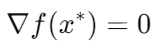

*   **Second-order necessary condition**: The gradient of *f(x)* at *x** must be zero and the Hessian matrix (which is a matrix of second-order partial derivatives) of f(x) at *x** must be positive semi-definite.

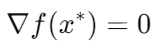

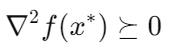



# Sufficient Conditions for Local Minimizers


*   **Second-order sufficient condition**: The gradient of *f(x)* at *x** must be zero and the Hessian matrix of f(x) at *x** must be positive definite.

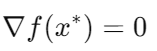


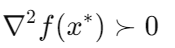




The following coding example analyzes a simple function (f(x)=x^2-4x+4) for local minimizers using necessary and sufficient conditions.

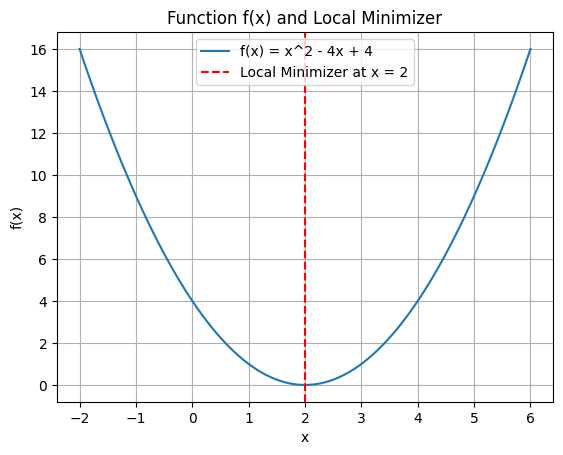

Necessary Condition (Gradient at x*) = 2: 0
Sufficient Condition (Hessian at x*) = 2: 2
x* = 2 is a local minimizer of f(x).


In [3]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return x**2 - 4*x + 4

#gradient of f(x)
def grad_f(x):
    return 2*x - 4

# hessian of f(x)
def hessian_f(x):
    return 2

# plot function
x_vals = np.linspace(-2, 6, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label="f(x) = x^2 - 4x + 4")
plt.axvline(x=2, color='r', linestyle='--', label="Local Minimizer at x = 2")
plt.title("Function f(x) and Local Minimizer")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

#possible minimizers
x_star = 2

# necessary condition
gradient_at_x_star = grad_f(x_star)
print(f"Necessary Condition (Gradient at x*) = {x_star}: {gradient_at_x_star}")

# sufficient condition
hessian_at_x_star = hessian_f(x_star)
print(f"Sufficient Condition (Hessian at x*) = {x_star}: {hessian_at_x_star}")

if gradient_at_x_star == 0 and hessian_at_x_star > 0:
    print(f"x* = {x_star} is a local minimizer of f(x).")
else:
    print(f"x* = {x_star} is not a local minimizer of f(x).")


# **3.3.2 Convexity and Global Minimizers**
A real-valued function is called **convex** if the line segment between any two points on the graph of the function lies above the graph between the two points. Thus, convexity implies that the function "curves upwards", and the local minimum of the function is also a global minimum.

The following graph is an example of a convex function.

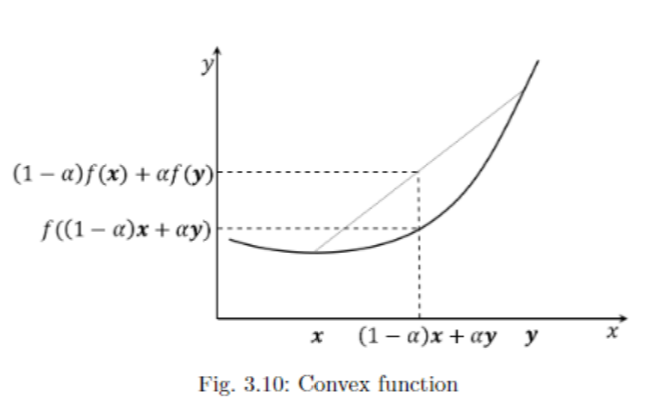


The first and second derivative tests can be used to determine if a function is convex.


*   **First-order test**: A differentiable function *f(x)* is convex is its gradient satisfies:

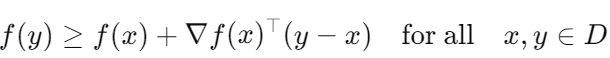
*   **Second-order test**: A twice-differentiable function f(x) is convex if its Hessian matrix is positive semi-definite:

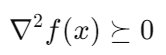




A **global minimum** of a function *f(x)* is the point *x** in the domain of the function where the function attains its lowest possible value across the entire domain.

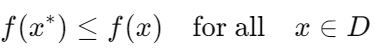


If a function *f(x)* is convex on a domain, then any local minimizer of the function is also a global minimizer. Thus, when optimizing an unconstrained convex function, finding a point where the gradient (first derivative) is zero guarantees that the point is a global minimizer.

The following program finds the global minimizer of a simple convex function
(f(x)=(x-3)^2+2).

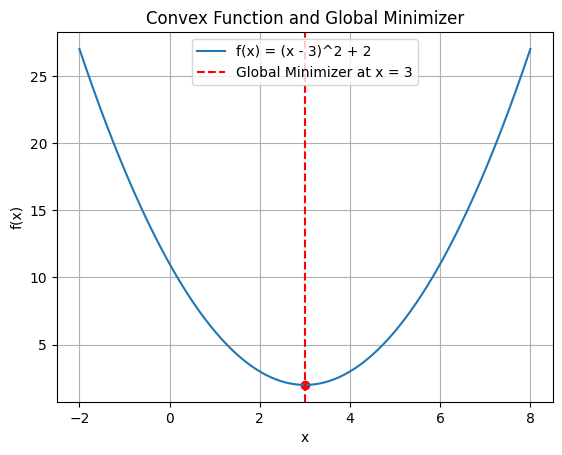

Gradient at x* = 3: 0 (0 indicates a minimum)
Hessian at x* = 3: 2 (Positive value indicates convexity)
x* = 3 is the global minimizer of f(x).


In [7]:
import numpy as np
import matplotlib.pyplot as plt

#function
def f(x):
    return (x - 3)**2 + 2

# gradient
def grad_f(x):
    return 2*(x - 3)

# second derivative
def hessian_f(x):
    return 2

x_vals = np.linspace(-2, 8, 400)
y_vals = f(x_vals)

# plotting
plt.plot(x_vals, y_vals, label="f(x) = (x - 3)^2 + 2")
plt.axvline(x=3, color='r', linestyle='--', label="Global Minimizer at x = 3")
plt.scatter(3, f(3), color='red')  # Mark the global minimum
plt.title("Convex Function and Global Minimizer")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

x_star = 3

# check if global minimizer
gradient_at_x_star = grad_f(x_star)
print(f"Gradient at x* = {x_star}: {gradient_at_x_star} (0 indicates a minimum)")

# check convexity
hessian_at_x_star = hessian_f(x_star)
print(f"Hessian at x* = {x_star}: {hessian_at_x_star} (Positive value indicates convexity)")

if gradient_at_x_star == 0 and hessian_at_x_star > 0:
    print(f"x* = {x_star} is the global minimizer of f(x).")
else:
    print(f"x* = {x_star} is not a global minimizer of f(x).")


# **3.3.3 Gradient Descent**
**Gradient descent** is an optimization algorithm used to find the minimum of a function by iteratively moving in the direction of the function's steepest decrease. The **gradient** of a function at a point *x* is a vector of partial derivatives which points in the direction of the steepest ascent (increase) of the function. To minimize a function, you move in the opposite direction of the gradient.

The general steps behind gradient descent are as follows:
1.   Start at a random input.
2.   Calculate the gradient at the current position.
3. Take a small step in the direction of the negative gradient.
4. Repeats until the function reaches its minimum.


# Steepest Descent
The **steepest descent approach** is to find smaller values of *f*  by successively following directions in which *f* decreases. Thus, you are determining the direction in which the function decreases most rapidly.

The steepest descent algorithm updates the next point x(k+1) by moving in the opposite direction of the gradient:

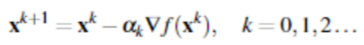

Here, ak is the **step size**, which determines how far to move in the direction of steepest descent.

The following program uses the steepest descent method to minimze the function *f(x,y)=x^2+y^2*, which is a convex function with a global minimum at (0,0).


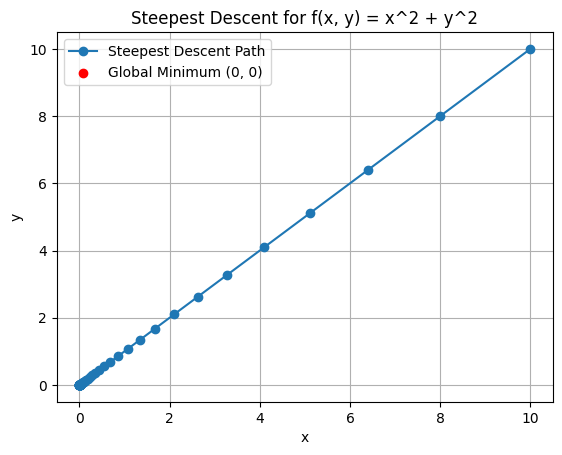

Final point: [0.00014272 0.00014272], f(x, y) = 4.0740719526689746e-08


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# define function
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2*x, 2*y])

# steepest descent parameters
x0 = np.array([10.0, 10.0])  # initial guess
learning_rate = 0.1
iterations = 50

x_values = [x0]
f_values = [f(x0[0], x0[1])]

# steepest descent
x = x0
for i in range(iterations):
    gradient = grad_f(x[0], x[1])
    x = x - learning_rate * gradient  #move in direction of steepest descent
    x_values.append(x)
    f_values.append(f(x[0], x[1]))

#plot
x_vals = [v[0] for v in x_values]
y_vals = [v[1] for v in x_values]
plt.plot(x_vals, y_vals, marker='o', label="Steepest Descent Path")
plt.scatter([0], [0], color='red', label='Global Minimum (0, 0)')
plt.title("Steepest Descent for f(x, y) = x^2 + y^2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
print(f"Final point: {x}, f(x, y) = {f(x[0], x[1])}")
